In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.size

900

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Id column not required.
df.drop('Id', axis=1, inplace=True)

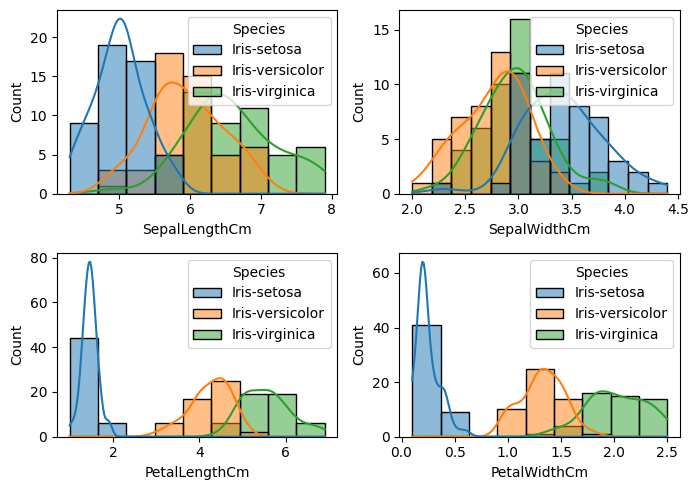

In [11]:
conti_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(7,5))
plotnumber=1
for column in conti_col:
    ax=plt.subplot(2,2,plotnumber)
    sns.histplot(x=df[column],hue='Species', kde=True, data=df)
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='count', ylabel='Species'>

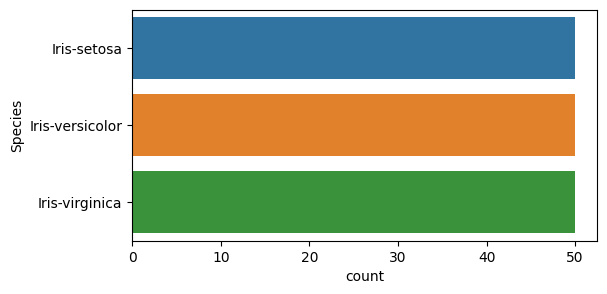

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(y='Species', data=df)


In [13]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

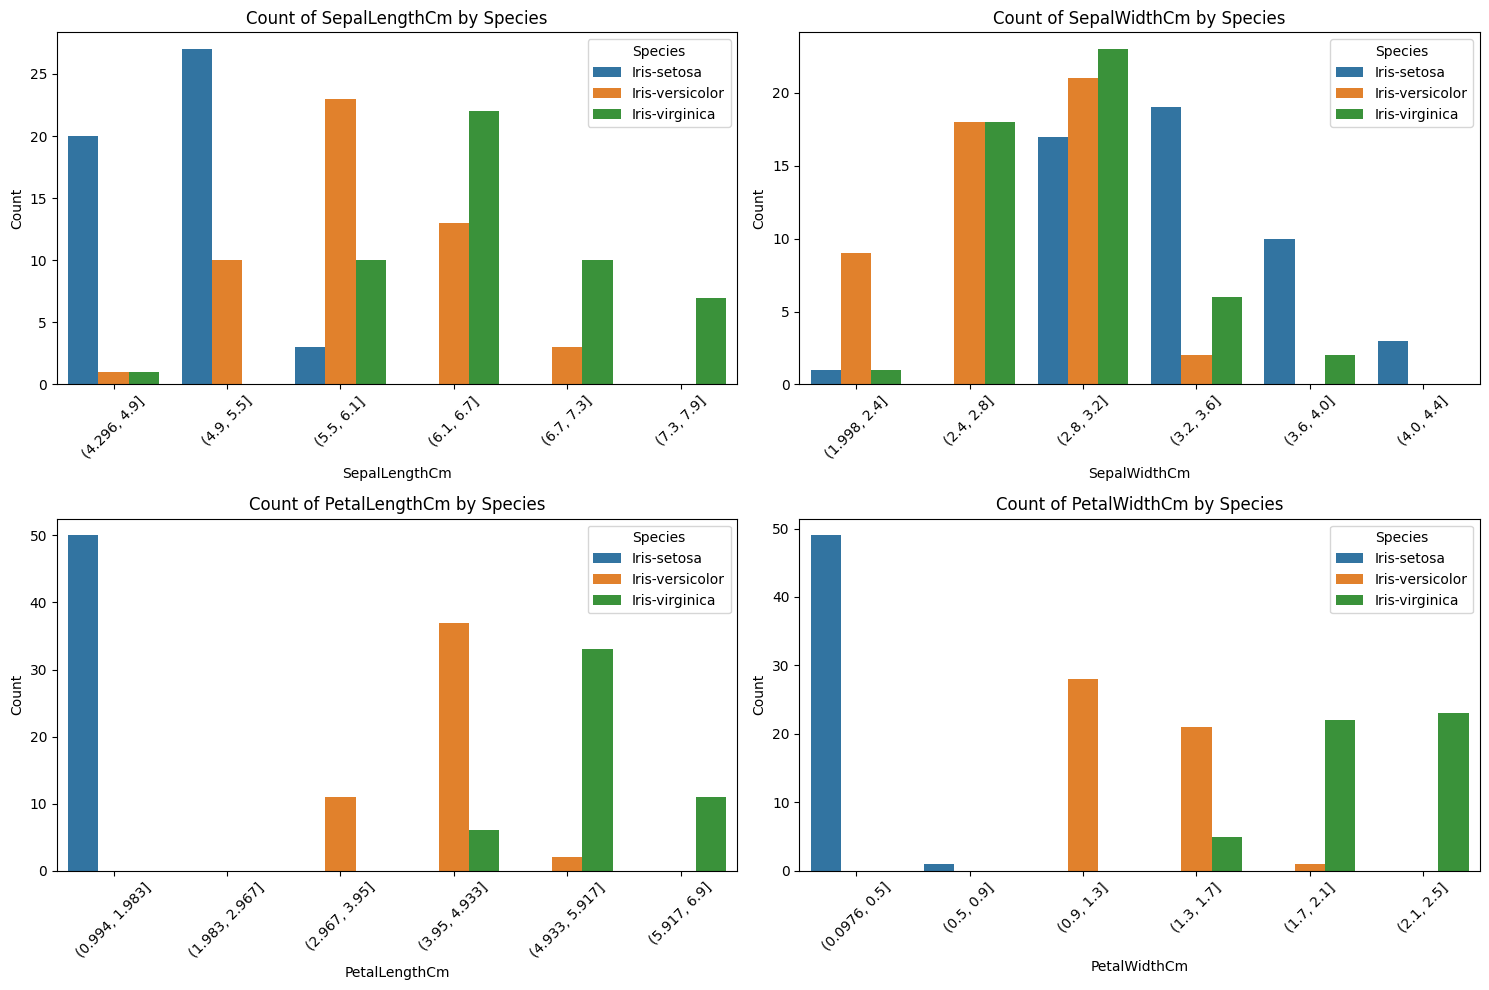

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# For each continuous column
for i, col in enumerate(conti_col):
    # Create bins for the continuous data
    # This converts continuous data to categorical bins
    df[f'{col}_binned'] = pd.cut(df[col], bins=6)
    
    # Create the count plot
    sns.countplot(x=f'{col}_binned', hue='Species', data=df, ax=axes[i])
    
    # Improve readability
    axes[i].set_title(f'Count of {col} by Species')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

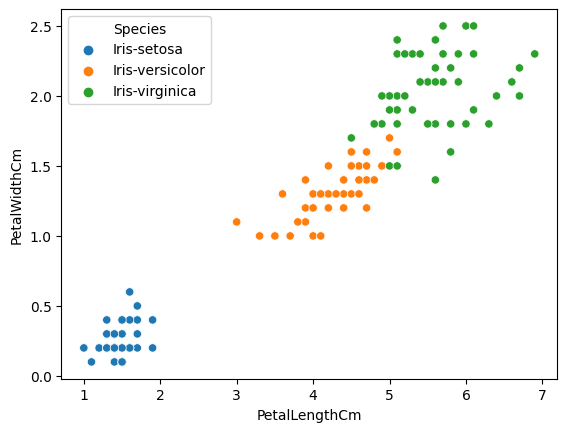

In [15]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)

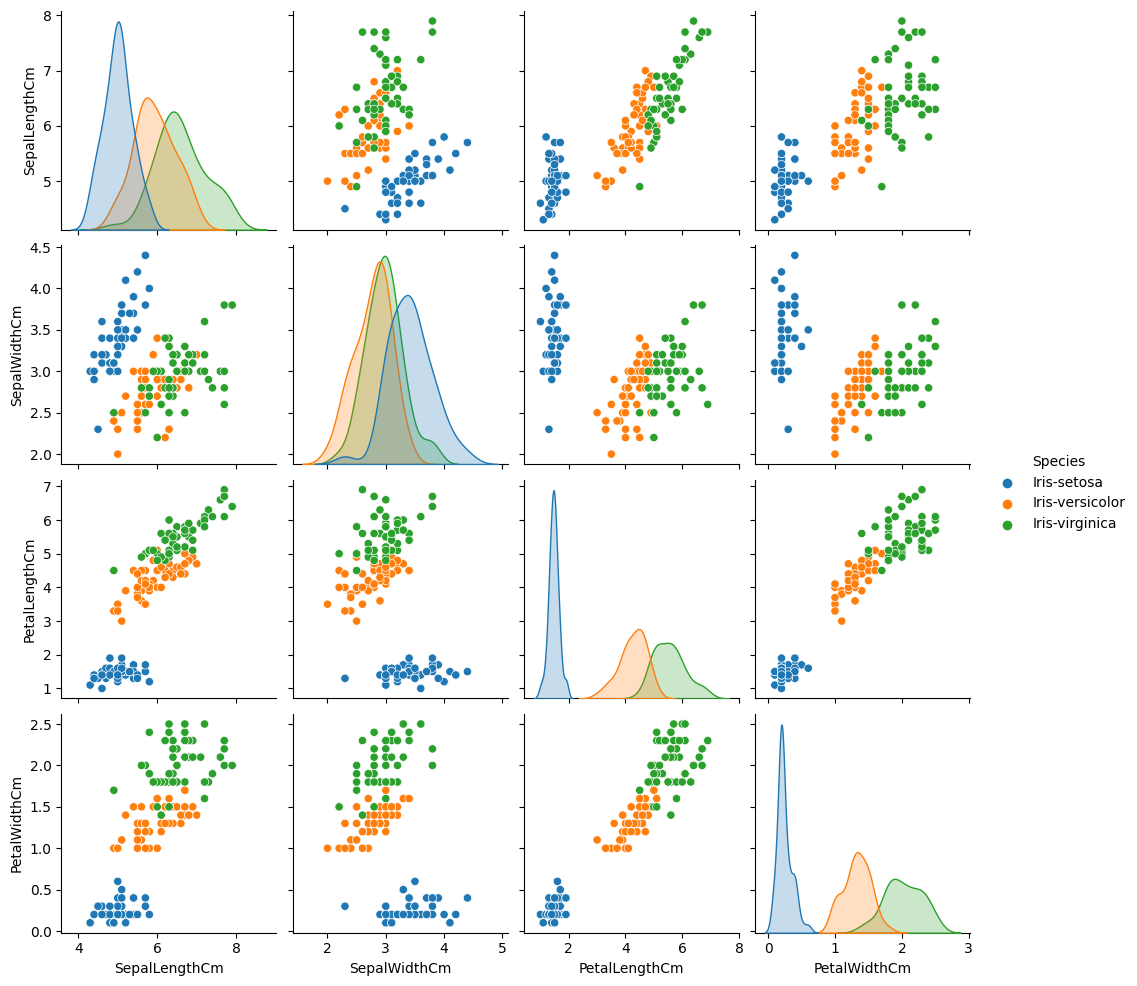

In [16]:
sns.pairplot(df, hue='Species')

<Axes: >

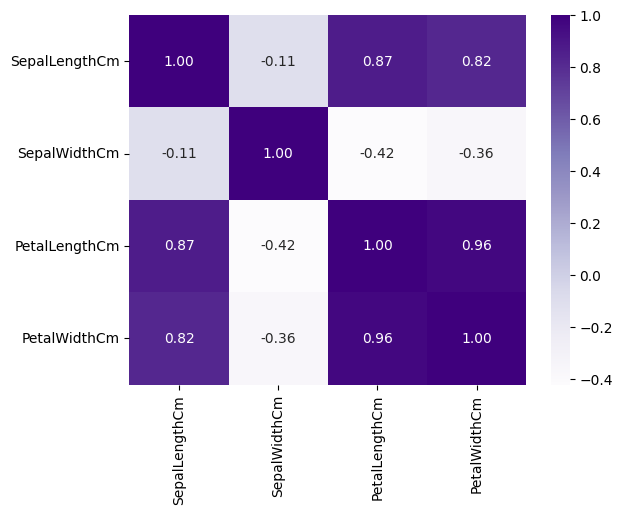

In [27]:
sns.heatmap(df.drop('Species',axis=1).corr(), annot=True, cmap='Purples', fmt='.2f')

In [34]:
X = df.drop('Species', axis=1)
y = df.Species

#Encoding y

le = LabelEncoder()

y_encoded = le.fit_transform(y)

#train test Split.

X_train,X_test,y_train,y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42)

print('Shape of X train:',X_train.shape)
print('Shape of X test:',X_test.shape)
print('Shape of y train:',y_train.shape)
print('Shape of y test:',y_test.shape)

Shape of X train: (120, 4)
Shape of X test: (30, 4)
Shape of y train: (120,)
Shape of y test: (30,)


In [29]:
# Models.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [36]:
models ={'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boost': GradientBoostingClassifier(),
         'SVM': SVC(),
         'XG Boost': XGBClassifier(),
         'Naive Bayes multi': MultinomialNB(),
         'Naive Bayes gauss': GaussianNB()}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    crossv_score = np.average(cross_val_score(model,X,y_encoded,cv=5))
    
    print('Model Name:',name)
    print('Accuracy Score:', ac)
    print('Cross Validation Score (Avg.):', crossv_score)

Model Name: Logistic Regression
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9733333333333334
Model Name: KNN
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9733333333333334
Model Name: Decision Tree
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9600000000000002
Model Name: Random Forest
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9600000000000002
Model Name: Gradient Boost
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9600000000000002
Model Name: SVM
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9666666666666666
Model Name: XG Boost
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9533333333333334
Model Name: Naive Bayes multi
Accuracy Score: 0.9
Cross Validation Score (Avg.): 0.9533333333333334
Model Name: Naive Bayes gauss
Accuracy Score: 1.0
Cross Validation Score (Avg.): 0.9533333333333334
